# Intro to Data Science Assignment 2 - Regression

This is the kaggle dataset: https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection
It includes information about specific patients experience. 

The majority of this code was taken from the Week-4-Regression Jupyter notebook (https://git.arts.ac.uk/tbroad/Intro-2-DS-22-23/blob/main/Week-4-Regression.ipynb) by Terry

## 1

Pick two numeric variables to compare. The dependent variable has to contiunous and numeric, otherwise its a classification problem and not really suitable for fitting a regression model.

In [2]:
import pandas as pd
import numpy as np
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from datetime import time

In [6]:
df = pd.read_csv("Parkinsson disease.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867
2,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.42990,0.82529,-4.44318,0.31117,2.34226,0.33263
3,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,0.43497,0.81924,-4.11750,0.33415,2.40555,0.36897
4,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,1,0.41736,0.82348,-3.74779,0.23451,2.33218,0.41034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.18800,230.97800,94.26100,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.40500,0.02336,0.02498,0.02745,0.07008,0.02764,19.51700,0,0.44844,0.65790,-6.53859,0.12195,2.65748,0.13305
191,phon_R01_S50_3,209.51600,253.01700,89.48800,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.26300,0.01604,0.01657,0.01879,0.04812,0.01810,19.14700,0,0.43167,0.68324,-6.19533,0.12930,2.78431,0.16889
192,phon_R01_S50_4,174.68800,240.00500,74.28700,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.25600,0.01268,0.01365,0.01667,0.03804,0.10715,17.88300,0,0.40757,0.65568,-6.78720,0.15845,2.67977,0.13173
193,phon_R01_S50_5,198.76400,396.96100,74.90400,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.24100,0.01265,0.01321,0.01588,0.03794,0.07223,19.02000,0,0.45122,0.64396,-6.74458,0.20745,2.13861,0.12331


MDVP:Fo(Hz) = Average Vocal Fundamental Frequency

MDVP:FHi(Hz) = Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [10]:
df.rename(columns = {'MDVP:Fo(Hz)':' AVFF(Hz)', 'MDVP:Fhi(Hz)':'MVFF(Hz)', 'MDVP:Flo(Hz)':'MVFF2(Hz)', 'MDVP:Jitter(%)':'VariationFF(%)', 'MDVP:Shimmer':'Variation_amplitude', 'NHR':'tonal_components', 'RPDE':'dynamic_complexity'}, inplace = True) #for Average vocal fundamental frequency
df

,name,AVFF(Hz),MVFF(Hz),MVFF2(Hz),VariationFF(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,Variation_amplitude,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,tonal_components,HNR,status,dynamic_complexity,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867
2,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.42990,0.82529,-4.44318,0.31117,2.34226,0.33263
3,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,0.43497,0.81924,-4.11750,0.33415,2.40555,0.36897
4,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,1,0.41736,0.82348,-3.74779,0.23451,2.33218,0.41034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.18800,230.97800,94.26100,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.40500,0.02336,0.02498,0.02745,0.07008,0.02764,19.51700,0,0.44844,0.65790,-6.53859,0.12195,2.65748,0.13305
191,phon_R01_S50_3,209.51600,253.01700,89.48800,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.26300,0.01604,0.01657,0.01879,0.04812,0.01810,19.14700,0,0.43167,0.68324,-6.19533,0.12930,2.78431,0.16889
192,phon_R01_S50_4,174.68800,240.00500,74.28700,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.25600,0.01268,0.01365,0.01667,0.03804,0.10715,17.88300,0,0.40757,0.65568,-6.78720,0.15845,2.67977,0.13173
193,phon_R01_S50_5,198.76400,396.96100,74.90400,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.24100,0.01265,0.01321,0.01588,0.03794,0.07223,19.02000,0,0.45122,0.64396,-6.74458,0.20745,2.13861,0.12331


In [11]:
df = df[['MVFF(Hz)', 'MVFF2(Hz)', 'VariationFF(%)', 'Variation_amplitude', 'tonal_components', 'dynamic_complexity', 'HNR']]
df

,MVFF(Hz),MVFF2(Hz),VariationFF(%),Variation_amplitude,tonal_components,dynamic_complexity,HNR
0,157.30200,74.99700,0.00784,0.04374,0.02211,0.41478,21.03300
1,148.65000,113.81900,0.00968,0.06134,0.01929,0.45836,19.08500
2,131.11100,111.55500,0.01050,0.05233,0.01309,0.42990,20.65100
3,137.87100,111.36600,0.00997,0.05492,0.01353,0.43497,20.64400
4,141.78100,110.65500,0.01284,0.06425,0.01767,0.41736,19.64900
...,...,...,...,...,...,...,...
190,230.97800,94.26100,0.00459,0.04087,0.02764,0.44844,19.51700
191,253.01700,89.48800,0.00564,0.02751,0.01810,0.43167,19.14700
192,240.00500,74.28700,0.01360,0.02308,0.10715,0.40757,17.88300
193,396.96100,74.90400,0.00740,0.02296,0.07223,0.45122,19.02000


In [13]:
df[['dynamic_complexity', 'HNR']].describe()

,dynamic_complexity,HNR
count,195.00000,195.00000
mean,0.49854,21.88597
std,0.10394,4.42576
min,0.25657,8.44100
25%,0.42131,19.19800
50%,0.49595,22.08500
75%,0.58756,25.07550
max,0.68515,33.04700


As you see above I reduced the number of columns as well as remaining them to make it easier to index into. The dataset itself is difficult to interpret from just the dataframe above, the means are both fairly different and aren't working on the same scale. THe standard deviation for dynamic_complexity is very low, meaning the values are clustered around the mean and that there isn't a huge differencein the each patients records. HNR, on the other hand, which measures noise to tonal components differs alot and thus patients may differ significantly from one another. 

## 2 

Describe how they relate to each other (include a plot)

Are they correlated? How? Can we draw any conclusions from this?

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Sadie Nathan\AppData\Local\Temp\ipykernel_10972\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,MVFF(Hz),MVFF2(Hz),VariationFF(%),Variation_amplitude,tonal_components,dynamic_complexity,HNR
MVFF(Hz),1.00,0.08,0.10,0.00,0.16,-0.11,-0.02
MVFF2(Hz),0.08,1.00,-0.14,-0.14,-0.11,-0.40,0.21
VariationFF(%),0.10,-0.14,1.00,0.77,0.91,0.36,-0.73
Variation_amplitude,0.00,-0.14,0.77,1.00,0.72,0.45,-0.84
tonal_components,0.16,-0.11,0.91,0.72,1.00,0.37,-0.71
dynamic_complexity,-0.11,-0.40,0.36,0.45,0.37,1.00,-0.60
HNR,-0.02,0.21,-0.73,-0.84,-0.71,-0.60,1.00


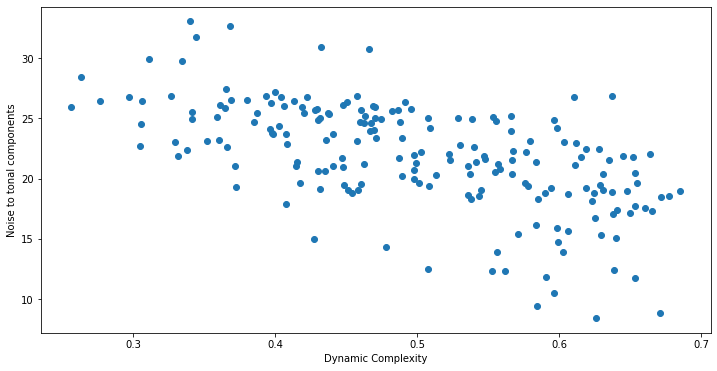

In [43]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = df[["dynamic_complexity","HNR"]].values
x = data[:,0] #/100000
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax

ax = plot_scatter(x,y,"Dynamic Complexity","Noise to Tonal Components")

In [44]:
from scipy import stats
r, p = stats.pearsonr(x,y)
r

-0.5987363367919915

The correlations plotted above the table are fitting with assumptions that could be made about the data, where there is correlation between tonal components and the frequency and variation of the sound and where this correlation exists a negative correlation exists between the HNR. This is interesting in that tonal components and HNR are measuring similar things, maybe this is because of differences in the method of recording or the nuance of what is being recorded. THe HNR and dynamic_complexity have a negative correlation which would make sense in relation to how the standard deviations of both are different from one another. 

The plot supports this negative correlation and shows that it isn't very strong of a correlation.

## 3

Fit a simple linear model

Interpret the results, what can you tell about the variables from the model? Can you make any useful predictions?

Evaluate your model. How good is the fit?

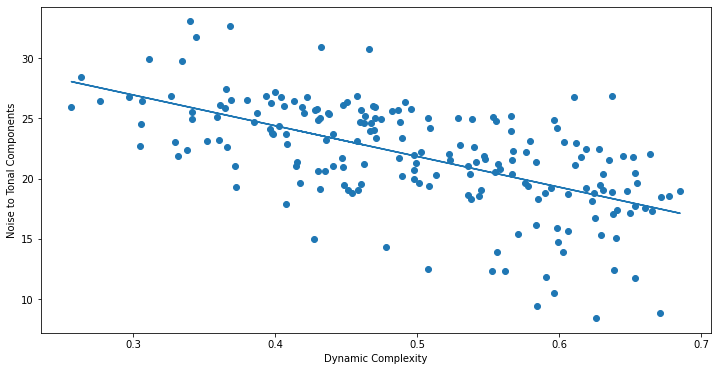

In [49]:
data = df[["dynamic_complexity","HNR"]].values
x = data[:,0] #/100000
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Dynamic Complexity","Noise to Tonal Components")
ax.plot(x, model_y)

In [50]:
slope, intercept

(-25.493767, 34.59552343037322)

In [51]:
r

-0.5987363367919911

In [52]:
p

2.359982849322648e-20

As established earlier the two variables, dynamic complexity and HNR have a moderate negative correlation, supported by the plot and the negative r value. As the p value is above 0.05 we can say that this relationship is not statistically significant and so we cannot say with absolute certainty that they are influencing one another. 

## 4
Pick (at least one, perhaps many) extra independent variables and fit a multiple regression model

Interpret the results, what can you tell about the variables from the model? Can you make any useful predictions?

In [58]:
x = (df["MVFF2(Hz)"] - df["MVFF(Hz)"][0])
y = df["HNR"].values

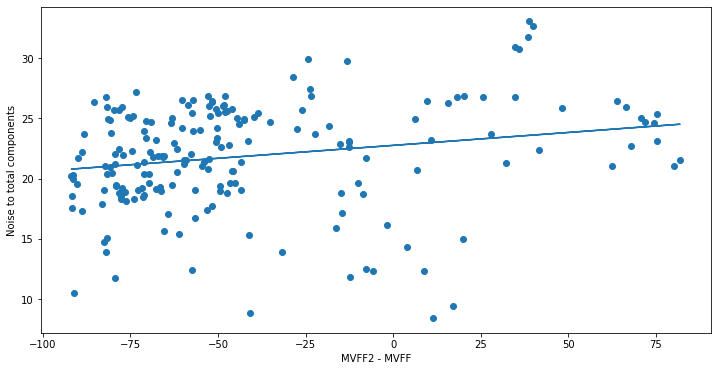

In [60]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]
ax = plot_scatter(x,y,"MVFF2 - MVFF", "Noise to total components",False)
ax.plot(x, model_y)

In the graph above I look at the Maximum vocal fundamental frequency (MVFF(Hz)), the Minimum vocal fundamental frequency (MVFF2) with the HNR, which shows a slight positive correlation, though the data is fairly scattered and so the fit of the regression line is not as good. 
What can be said is the larger the range of the vocal frequency the higher we would expect the noise to tonal components to be, or that those who can speak with a larger variance of pitches tend to be able to louder with each specific sound. 


In [17]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
x = df[['MVFF(Hz)','MVFF2(Hz)']]
y = df['HNR'] 
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y)) 

[-0.00208569  0.02181425] 19.75953901687409 0.04630370434626163


In [18]:
regr.predict([[148.65000,113.81900]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.93237772])

## 5

What ethical issues may arise from using these models to make predictions?

What extra data (more variables, better variables) would improve your current models, or allow you to make better, different models?

Due to this dataset being related to medical information we would expect to use it to be able to see patterns in people with these diseases, however this leaves it open for potential mismanagement of the data in unethical ways. Just because the data suggests that one form of treatment or rehabilitation might be useful it is obviously also important to relay back with the patient and their specific medical team to understand what steps to take. There is also how this data is protected as most medical information is considered highly sensitive and cofindential, especially by doctors and nurses. The way this data is collected is one of the most important factors when it comes to being able to understand and potentially make predictions based off the data. 
I think more data on the patients themselves, age, sex, or disease stage might give more clarity to the data and to get better results from it. I think the data is also fairly specific to the issue of Parkinssons and not as accessible to non-medical practitioners (this being completely understandable) but would be easier to work with if the data was clearer in some ways. 